# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
df = pd.read_csv('assets/real_estate.csv', sep=';')
print(df)

       Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0               1       153771986  False            ferrari 57 inmobiliaria   
1               2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2               3       153430440  False                 look find boadilla   
3               4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4               5       153180188  False            ferrari 57 inmobiliaria   
...           ...             ...    ...                                ...   
15330       15331       153901377  False                infocasa consulting   
15331       15332       150394373  False                inmobiliaria pulpon   
15332       15333       153901397  False             tecnocasa torrelodones   
15333       15334       152607440  False                inmobiliaria pulpon   
15334       15335       153901356  False                infocasa consulting   

       phone_realEstate                            

#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [ ]:

expensive_price = df['price'].max() # Esto me da el precio maximo

index_expensive = df['price'].idxmax() # Esto me da el índice donde está el precio maximo

# Con el indice puedo saber la direccion de la casa

direccion_expensive = df.loc[index_expensive, 'address']

print(f"The house with address {direccion_expensive} is the most expensive and its price is {expensive_price} USD")

The house with address El Escorial is the most expensive and its price is 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [ ]:

cheapest_price = df['price'].min() # Esto me da el precio minimo

index_cheapest = df['price'].idxmin() # Esto me da el índice donde está el precio minimo

# Con el indice puedo saber la direccion de la casa

direccion_cheapest = df.loc[index_cheapest, 'address']

print(f"The house with address {direccion_cheapest} is the cheapest and its price is {cheapest_price} USD")

The house with address Parla is the cheapest and its price is 0 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [ ]:

smallest_surface = df['surface'].min() # Esto me da la superficie minima
biggest_surface = df['surface'].max() # Esto me da la superficie maxima

index_smallest = df['surface'].idxmin() # Esto me da el índice donde está la superficie minima
index_biggest = df['surface'].idxmax() # Esto me da el índice donde está la superficie maxima

# Con el indice puedo saber la direccion de la casa
direccion_smallest = df.loc[index_smallest, 'address']
direccion_biggest = df.loc[index_biggest, 'address']

print(f"The smallest house is located on {direccion_smallest} and its surface is {smallest_surface} meters")

print(f"The biggest house is located on {direccion_biggest} and its surface is {biggest_surface} meters")

The smallest house is located on Calle Amparo,  Madrid Capital and its surface is 15.0 meters
The biggest house is located on Sevilla la Nueva and its surface is 249000.0 meters


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [ ]:
poblaciones = df['level5'].unique()

print(poblaciones) # Lo imprime como df

poblaciones_str = ', '.join(poblaciones)

# Imprimir las poblaciones únicas separadas por comas
print(poblaciones_str)



['Arganda del Rey' 'Fuenlabrada' 'Boadilla del Monte'
 'Las Rozas de Madrid' ' Madrid Capital' 'Villaviciosa de Odón' 'Pinto'
 'Valdemoro' 'Navalcarnero' 'Pozuelo de Alarcón' 'Torrejón de Ardoz'
 'Navalagamella' 'San Sebastián de los Reyes' 'Rivas-vaciamadrid'
 'Alpedrete' 'Móstoles' 'San Fernando de Henares' 'Coslada'
 'Becerril de la Sierra' 'Alcalá de Henares' 'Chinchón' 'Parla' 'Alcorcón'
 'El Escorial' 'Leganés' 'Pedrezuela' 'Majadahonda'
 'Villanueva de la Cañada' 'Villanueva del Pardillo' 'Torrelodones'
 'Moralzarzal' 'Mejorada del Campo' 'Aranjuez' 'Corpa' 'Getafe'
 'Velilla de San Antonio' 'Sevilla la Nueva' 'San Martín de la Vega'
 'Villalbilla' 'Collado Villalba' 'Alcobendas' 'El Molar (Madrid)'
 'Moraleja de Enmedio' 'Algete' 'Campo Real' 'Torrejón de la Calzada'
 'Colmenar Viejo' 'Valdemorillo' 'Fuente El Saz de Jarama' 'Tres Cantos'
 'Arroyomolinos (Madrid)' 'Griñón' 'Paracuellos de Jarama' 'Guadarrama'
 'Titulcia' 'Galapagar' 'Collado Mediano' 'Los Molinos'
 'San Lorenzo

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [ ]:
# Encontrar los valores NaN en el DataFrame
nan_positions = df.isna()

# Verificar si hay algún valor NaN
if nan_positions.any().any():
    # Iterar sobre el DataFrame para encontrar las posiciones de los NaN
    for row in range(len(df)):
        for col in df.columns:
            if nan_positions.at[row, col]:
                print(f"NaN encontrado en la fila {row}, columna '{col}'")
else:
    print("No se encontraron valores NaN en el DataFrame")

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [ ]:

df_sin_na = df.dropna()


print(f"La dimensión original es {df.shape}, después de eliminar los Na queda {df_sin_na.shape}")
# Al quitar los na con dropna() se están quitando la fila entera en cuanto se encuentra un na 
# y hay 1 o 2 columnas que tienen todo na por lo que se están borrando todos los resgistros

La dimensión original es (15335, 37), después de eliminar los Na queda (0, 37)


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [ ]:
media_precios = df.groupby('level5')['price'].mean()

# print(media_precios)


media_arroyo = media_precios.loc['Arroyomolinos (Madrid)']
print(f" La media de precios en la población de Arroyomolinos (Madrid) es {media_arroyo} euros")


 La media de precios en la población de Arroyomolinos (Madrid) es 294541.59854014596 euros


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


453      165338
607      251646
613      396000
707      225000
852      373000
          ...  
15019    218000
15089    230000
15091    217000
15094    227000
15192    462000
Name: price, Length: 137, dtype: int64


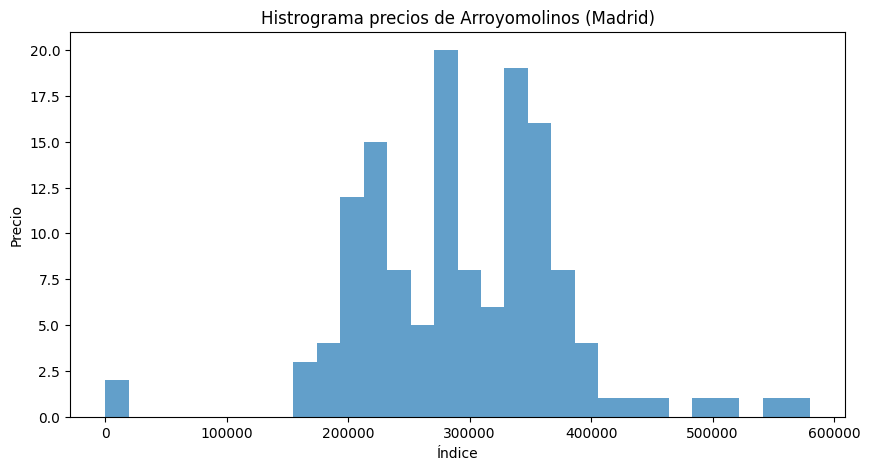

In [ ]:

data_arroyo = df.loc[df['level5'] =='Arroyomolinos (Madrid)']

precios_arroyo = data_arroyo['price']
print(precios_arroyo)

plt.figure(figsize = (10, 5))

plt.hist(precios_arroyo, bins = 30, alpha = 0.7)

plt.title('Histrograma precios de Arroyomolinos (Madrid)')
plt.xlabel('Precio')
plt.ylabel('')
plt.show()

**Análisis del trazado**. Observando el histograma notamos que hay registos con precio 0, además, la distribución sigue, grosso modo, una distribución de campana de Gauss 
con la mayoría de valores en los precos centrales.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [ ]:
media_precios = df.groupby('level5')['price'].mean()

# print(media_precios)

media_valdemorillo = media_precios.loc['Valdemorillo']
media_galapagar = media_precios.loc['Galapagar']
print(f" La media de precios en la población de Valdemorillo es {media_valdemorillo} euros, mientras que la de Galapagar es de {media_galapagar} euros")
diferencia = media_valdemorillo - media_galapagar

print(f"La diferencia es de {diferencia} euros")

 La media de precios en la población de Valdemorillo es 363860.2931034483 euros, mientras que la de Galapagar es de 360063.20238095237 euros
La diferencia es de 3797.090722495923 euros


**Conclusión promedios de "Valdemorillo" y "Galapagar":** Aunque existe cierta diferencia en los precios promedio de los inmuebles en ambas zonas (siendo en la zona de Valdemorillo donde el promedio es mayor) esta diferencia es poco trancendental teniendo en cuenta la magnitud de los precios

#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [ ]:
# Creo la nueva columna price per square
df['pps'] = df['price'] / df['surface']

# Agrupamos por población y hacemos el promedio de los precios por metro 2
media_precios = df.groupby('level5')['pps'].mean()


media_pps_valdemorillo = media_precios.loc['Valdemorillo']
media_pps_galapagar = media_precios.loc['Galapagar']

print(f" La media de precio por metro cuadrado en la población de Valdemorillo es {media_pps_valdemorillo} euros, mientras que la de Galapagar es de {media_pps_galapagar} euros")

diferencia = media_pps_valdemorillo - media_pps_galapagar

print(f"La diferencia es de {diferencia} euros")

# Comprobación a posteriori
media_superficie = df.groupby('level5')['surface'].mean()
media_superficie_valdemorillo = media_superficie.loc['Valdemorillo']
media_superficie_galapagar = media_superficie.loc['Galapagar']
print(f" La media de superficie de las casas en la población de Valdemorillo es {media_superficie_valdemorillo} m2, mientras que en Galapagar es de {media_superficie_galapagar} m2")

 La media de superficie de las casas en la población de Valdemorillo es 350.0188679245283 m2, mientras que en Galapagar es de 305.52 euros
 La media de precio por metro cuadrado en la población de Valdemorillo es 1317.9502109024984 euros, mientras que la de Galapagar es de 1606.3240303094024 euros
La diferencia es de -288.373819406904 euros


**Conclusión promedios precio por metro cuadrado de "Valdemorillo" y "Galapagar":** como vimos antes, los precios en Valdemorillo son, en promedio, más altos que en Galapagar, sin embargo, con esto último descubrimos que el precio del metro cuadrado en Valdemorillo es inferior que en Galapagar, por lo tanto seguramente esté ocurriendo que en general, en Valdemorillo las casas tengan más superficie que en Galapagar. Esto lo comprobamos a posteriori y lo confirmamos.

#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

0    195000
2    390000
3     89000
4    172000
5    315000
Name: price, dtype: int64
0    103.0
2     99.0
3     86.0
4    106.0
5     70.0
Name: surface, dtype: float64


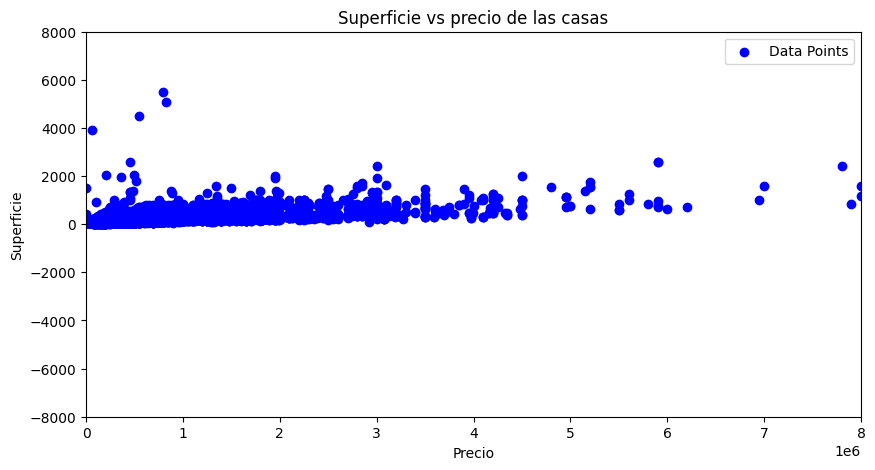

"\nprecios = df['price'].unique()\nprint(precios)\n"

In [ ]:
# Convertir la columna 'price' a tipo numérico, forzando errores a NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Eliminar filas con valores NaN en 'price' o 'surface'
df.dropna(subset=['price', 'surface'], inplace=True)

x = df['price']
y = df['surface']

print(x.head())
print(y.head())
plt.figure(figsize = (10, 5))

plt.scatter(x, y, c='blue', label='Data Points', marker= 'o')

plt.xlabel('Precio')
plt.ylabel('Superficie')

plt.title("Superficie vs precio de las casas")
plt.legend()

# Ajustar los límites del eje X e Y para hacer zoom
plt.xlim([0, max(x)])  
plt.ylim([ -8000, 8000])  

plt.show()


# Comprobación de los precios con un histograma
"""
print(x)
plt.figure(figsize = (10, 5))

plt.hist(x, bins = 30, alpha = 0.7)

plt.title('Histrograma precios')
plt.xlabel('Precio')
plt.ylabel('')
plt.show()
"""

# Comprobación precios
"""
precios = df['price'].unique()
print(precios)
"""
# 1e6 los valores en el eje x están elevados a 6


**Conclusión relación precio y superficie:** a grandes rasgos podemos decir que el precio y la superficie siguen una relación lineal creciente, es decir, a los valores con mayor superficie se corresponden con valores de precio mayor. Igualmente, hay algunos puntos que se alejan de esta tendencia, tendiendo puntos de superficie que se disparan.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [ ]:
agencias = df['realEstate_name'].unique()

print(f"Hay {len(agencias)} agencias de bienes raíces")

Hay 1822 agencias de bienes raíces


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [ ]:
cuenta_poblaciones = df['level5'].value_counts()
print(cuenta_poblaciones.head())
poblacion_max = cuenta_poblaciones.idxmax()
cantidad_max = cuenta_poblaciones.max()

print(f'La población que contiene mayor cantidad de casas es {poblacion_max} con {cantidad_max} casas.')

level5
 Madrid Capital        6643
Alcalá de Henares       525
Las Rozas de Madrid     383
Móstoles                325
Getafe                  290
Name: count, dtype: int64
La población que contiene mayor cantidad de casas es  Madrid Capital con 6643 casas.


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [47]:
cinturon_sur = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']

subset = df[df['level5'].isin(cinturon_sur)]
print(subset['level5'].unique())
print(subset.head())

['Fuenlabrada' 'Alcorcón' 'Leganés' 'Getafe']
     Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
1             2       153867863  False  tecnocasa fuenlabrada ferrocarril   
3             4       152776331  False  tecnocasa fuenlabrada ferrocarril   
85           86       153152077  False            sinergical inmobiliaria   
94           95       153995577  False                    viviendas365com   
109         110       153586414  False    area uno asesores inmobiliarios   

     phone_realEstate                                       url_inmueble  \
1         916358736.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
3         916358736.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
85                NaN  https://www.fotocasa.es/es/comprar/vivienda/le...   
94        911226014.0  https://www.fotocasa.es/es/comprar/vivienda/le...   
109       912664081.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   

     rooms  bathrooms  surface   p

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

level5
Alcorcón       179500.0
Fuenlabrada    155000.0
Getafe         285305.0
Leganés        169950.0
Name: price, dtype: float64


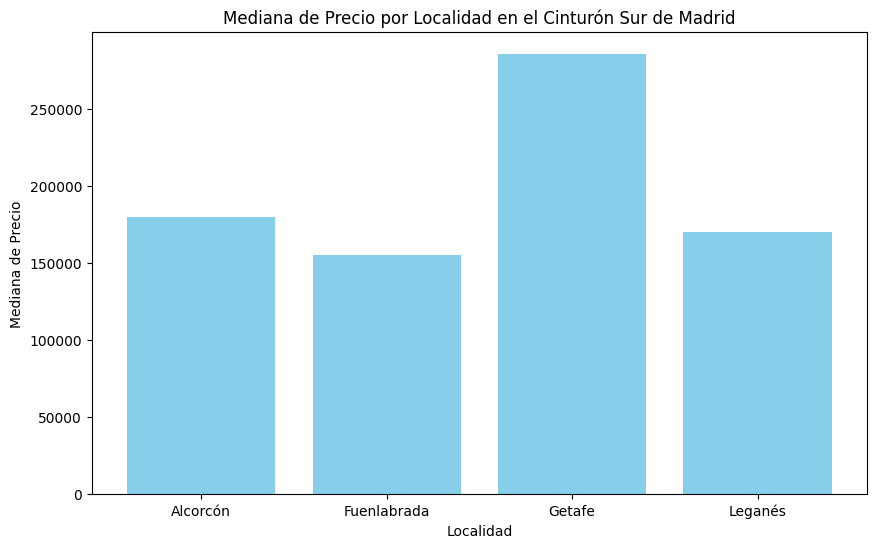

In [ ]:

mediana_precios = subset.groupby('level5')['price'].median()

print(mediana_precios.head())


plt.figure(figsize=(10, 6))
plt.bar(mediana_precios.index, mediana_precios.values, color='skyblue')

plt.xlabel('Localidad')
plt.ylabel('Mediana de Precio')
plt.title('Mediana de Precio por Localidad en el Cinturón Sur de Madrid')


plt.show()

**Análisis de la gráfica:** encontramos que la mediana de los precios es mayor en Getafe que en el resto de ciudades estudiadas lo cual nos indica que en dicha ciudad el valor central es mayor.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [4]:
# Calculo medias por cada localidad
# media_precios = subset.groupby('level5')['price'].median()
# media_rooms = subset.groupby('level5')['rooms'].median()
# media_surface = subset.groupby('level5')['surface'].median()
# media_bathrooms = subset.groupby('level5')['bathrooms'].median()


# Calculo varianza por cada localidad
# var_precios = subset.groupby('level5')['price'].var()
# var_rooms = subset.groupby('level5')['rooms'].var()
# var_surface = subset.groupby('level5')['surface'].var()
# var_bathrooms = subset.groupby('level5')['bathrooms'].var()

# Calculo medias entre todas las localidades
media_precios = subset['price'].median()
media_rooms = subset['rooms'].median()
media_surface = subset['surface'].median()
media_bathrooms = subset['bathrooms'].median()


# Calculo varianza entre todas las localidades
var_precios = subset['price'].var()
var_rooms = subset['rooms'].var()
var_surface = subset['surface'].var()
var_bathrooms = subset['bathrooms'].var()

print(f"PRECIOS  Media: {media_precios}  Varianza: {var_precios}")
print(f"HABITACIONES  Media: {media_rooms}  Varianza: {var_rooms}")
print(f"SUPERFICIE  Media: {media_surface}  Varianza: {var_surface}")
print(f"BAÑOS Media: {media_bathrooms}  Varianza: {var_bathrooms}")


PRECIOS  Media: 175000.0  Varianza: 14921367508.04902
HABITACIONES  Media: 3.0  Varianza: 0.7188858892927542
SUPERFICIE  Media: 89.0  Varianza: 4263.051760316337
BAÑOS Media: 1.0  Varianza: 0.5717968625577321


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [10]:
maximo_precios = subset.groupby('level5')['price'].max()
indice_maximo_precios = subset.groupby('level5')['price'].idxmax()
mas_caras = subset.loc[indice_maximo_precios,  ['address', 'price']]

print(mas_caras)


                                     address    price
5585                                Alcorcón   950000
11561  Calle de Paulo Freire, 5, Fuenlabrada   490000
2881                                  Getafe  1050000
10412           Avenida Reina Sofía, Leganés   650000


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

/tmp/ipykernel_828/3736850112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['precio_normalizado'] = subset.groupby('level5')['price'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))


['Fuenlabrada' 'Alcorcón' 'Leganés' 'Getafe']


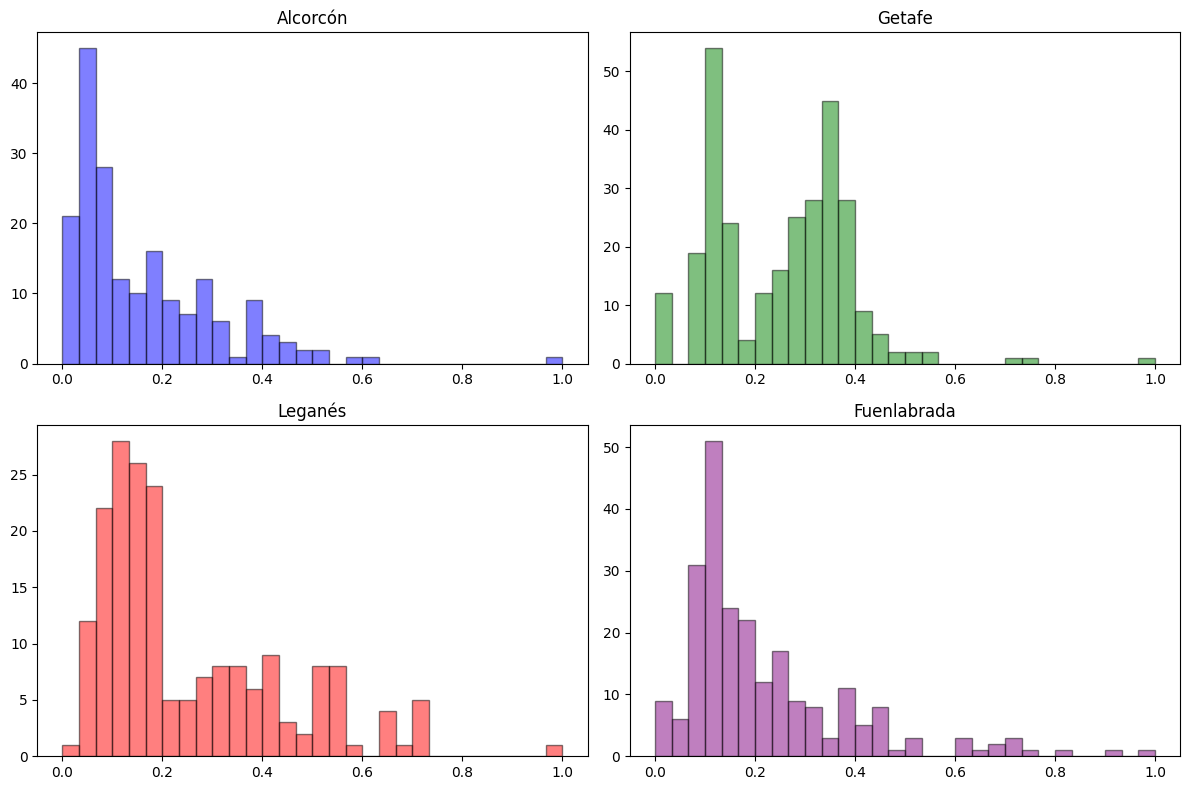

In [52]:
# Normalizacion con método min-max
subset['precio_normalizado'] = subset.groupby('level5')['price'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

print(subset['level5'].unique()) 

subset_alcorcon = subset[subset['level5'].isin(['Alcorcón'])]
precios_alcorcon = subset_alcorcon['precio_normalizado']
#print(precios_alcorcon)

subset_getafe = subset[subset['level5'].isin(['Getafe'])]
precios_getafe = subset_getafe['precio_normalizado']
# print(precios_getafe)


subset_leganes = subset[subset['level5'].isin(['Leganés'])]
precios_leganes = subset_leganes['precio_normalizado']

subset_fuenlabrada = subset[subset['level5'].isin(['Fuenlabrada'])]
precios_fuenlabrada = subset_fuenlabrada['precio_normalizado']

# Crea una figura y los subplots para cada histograma
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.hist(precios_alcorcon, bins=30, alpha=0.5, color='blue', edgecolor='black')
ax1.set_title('Alcorcón')

ax2.hist(precios_getafe, bins=30, alpha=0.5, color='green', edgecolor='black')
ax2.set_title('Getafe')

ax3.hist(precios_leganes, bins=30, alpha=0.5, color='red', edgecolor='black')
ax3.set_title('Leganés')

ax4.hist(precios_fuenlabrada, bins=30, alpha=0.5, color='purple', edgecolor='black')
ax4.set_title('Fuenlabrada')

plt.tight_layout()

plt.show()


**Análisis sobre el gráfico:** los histogramas muestran, en general, una distribución con un sesgo hacia la izquierda, donde la mayoría de los datos están concentrados en los precios más bajos, a excepción de los datos de Getafe que están más centrados, siguiendo una tendencia más cercana a una campana de Gauss.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [ ]:
from ipyleaflet import Map, basemaps

# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

In [ ]:
## Aquí: traza la coordenadas de los estados

## PON TU CÓDIGO AQUÍ:
